In [414]:
#!pip3 install nltk
#!pip3 install matplotlib
#!pip3 install pandas

In [415]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kamilorwat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kamilorwat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kamilorwat/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [416]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd

LINES = ['-', ':', '--'] # Line styles for the plot
%matplotlib inline

Reads file and returns it's content as string

In [417]:
def text_to_string(filename):
    with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
        return file.read()

In [418]:
strings_by_author = dict()
strings_by_author['doyle'] = text_to_string('./data/hound.txt')
strings_by_author['wells'] = text_to_string('./data/war.txt')
strings_by_author['unknown'] = text_to_string('./data/lost.txt')

Returns dict containing lists of tokens attached to authors.

In [419]:
def make_word_dict(strings_by_author):
    words_by_author = dict()
    
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = ([token.lower() for token in tokens if token.isalpha()])
    
    return words_by_author

In [420]:
words_by_author = make_word_dict(strings_by_author)
words_by_author

{'doyle': ['sherlock',
  'holmes',
  'who',
  'was',
  'usually',
  'very',
  'late',
  'in',
  'the',
  'mornings',
  'save',
  'upon',
  'those',
  'not',
  'infrequent',
  'occasions',
  'when',
  'he',
  'was',
  'up',
  'all',
  'night',
  'was',
  'seated',
  'at',
  'the',
  'breakfast',
  'table',
  'i',
  'stood',
  'upon',
  'the',
  'and',
  'picked',
  'up',
  'the',
  'stick',
  'which',
  'our',
  'visitor',
  'had',
  'left',
  'behind',
  'him',
  'the',
  'night',
  'before',
  'it',
  'was',
  'a',
  'fine',
  'thick',
  'piece',
  'of',
  'wood',
  'of',
  'the',
  'sort',
  'which',
  'is',
  'known',
  'as',
  'a',
  'penang',
  'lawyer',
  'just',
  'under',
  'the',
  'head',
  'was',
  'a',
  'broad',
  'silver',
  'band',
  'nearly',
  'an',
  'inch',
  'across',
  'to',
  'james',
  'mortimer',
  'from',
  'his',
  'friends',
  'of',
  'the',
  'was',
  'engraved',
  'upon',
  'it',
  'with',
  'the',
  'date',
  'it',
  'was',
  'just',
  'such',
  'a',
  'st

Find length of a shortest corpus of text

In [421]:
def find_shortest_corpus(words_by_author: dict):
    word_count = []
    
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print("\n Length of corpus for", author, ":", len(words_by_author[author]))
    
    len_shortest_corpus = min(word_count)
    print("\n Shortest corpus length:", len_shortest_corpus)
    return len_shortest_corpus

In [422]:
len_shortest_corpus = find_shortest_corpus(words_by_author)


 Length of corpus for doyle : 58672

 Length of corpus for wells : 59447

 Length of corpus for unknown : 74961

 Shortest corpus length: 58672


Compare the lengths of a words and create a graph of them

In [423]:
def word_length_test(words_by_author, len_shortest_corpus):
    by_author_length_freq_dist = dict()
    
    for i, author in enumerate(words_by_author):
        words_length = [len(word) for word in words_by_author[author][:len_shortest_corpus]]
        by_author_length_freq_dist[author] = nltk.FreqDist(words_length)
        by_author_length_freq_dist[author].plot(label=author, linestyle=LINES[i], show=False)
    
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    return by_author_length_freq_dist

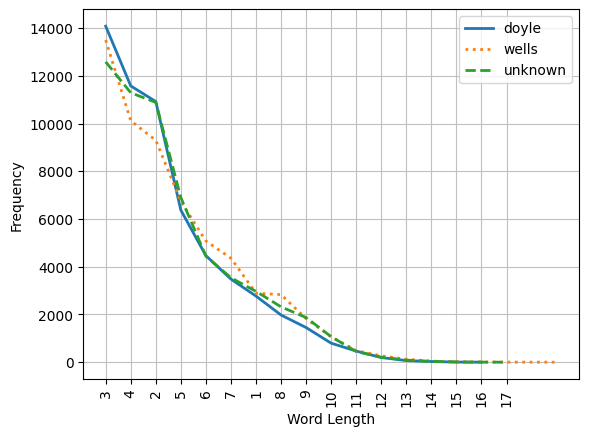

{'doyle': FreqDist({3: 14084, 4: 11580, 2: 10925, 5: 6373, 6: 4466, 7: 3482, 1: 2771, 8: 1977, 9: 1452, 10: 797, ...}),
 'wells': FreqDist({3: 13504, 4: 10118, 2: 9300, 5: 6742, 6: 5082, 7: 4357, 8: 2893, 1: 2833, 9: 1828, 10: 1064, ...}),
 'unknown': FreqDist({3: 12588, 4: 11294, 2: 10889, 5: 6900, 6: 4443, 7: 3539, 1: 2968, 8: 2320, 9: 1870, 10: 1070, ...})}

In [424]:
word_length_test(words_by_author, len_shortest_corpus)

Non-indexed words

In [425]:
def stopwords_test(words_by_author: dict, len_shortest_corpus: int):
    by_author_stopwords_freq_dist = dict()
    stop_words = set(stopwords.words('english'))
    plt.figure(2)

    for i, author in enumerate(words_by_author):
        words = [word for word in words_by_author[author][:len_shortest_corpus] if word not in stop_words]
        by_author_stopwords_freq_dist[author] = nltk.FreqDist(words)
        by_author_stopwords_freq_dist[author].plot(50, label=author, linestyle=LINES[i], title="Stopwords Frequency Distribution", cumulative=False, show=False)
        
    plt.legend()
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.show()
    return by_author_stopwords_freq_dist

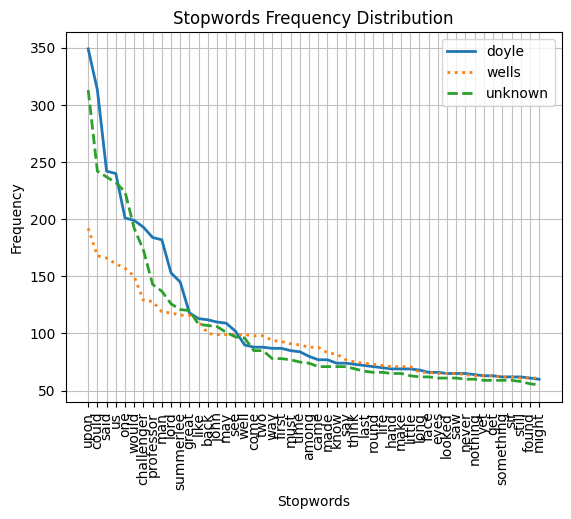

{'doyle': FreqDist({'sir': 349, 'upon': 313, 'one': 242, 'said': 240, 'could': 201, 'man': 199, 'would': 193, 'holmes': 184, 'us': 182, 'moor': 153, ...}),
 'wells': FreqDist({'one': 192, 'upon': 168, 'said': 166, 'martians': 161, 'people': 157, 'came': 150, 'towards': 129, 'saw': 128, 'black': 119, 'time': 118, ...}),
 'unknown': FreqDist({'upon': 313, 'could': 242, 'said': 237, 'us': 232, 'one': 224, 'would': 192, 'challenger': 173, 'professor': 143, 'man': 137, 'lord': 126, ...})}

In [426]:
stopwords_test(words_by_author, len_shortest_corpus)

Categorizes text into categories and tags them. Then the function counts their frequency and graphs it.

In [427]:
def parts_of_speech_test(words_by_author, len_shortest_corpus):
    by_author_pos_freq_dist = dict()
    plt.figure(3)
    for i, author in enumerate(words_by_author):
        pos_by_author = nltk.pos_tag(words_by_author[author][:len_shortest_corpus])
        
        by_author_pos_freq_dist[author] = nltk.FreqDist([tag for _, tag in pos_by_author])
        by_author_pos_freq_dist[author].plot(35, label=author, linestyle=LINES[i], title="Parts of Speech Frequency Distribution", cumulative=False, show=False)
    
    plt.legend()
    plt.xlabel('Parts of Speech')
    plt.ylabel('Frequency')
    plt.show()
    return by_author_pos_freq_dist

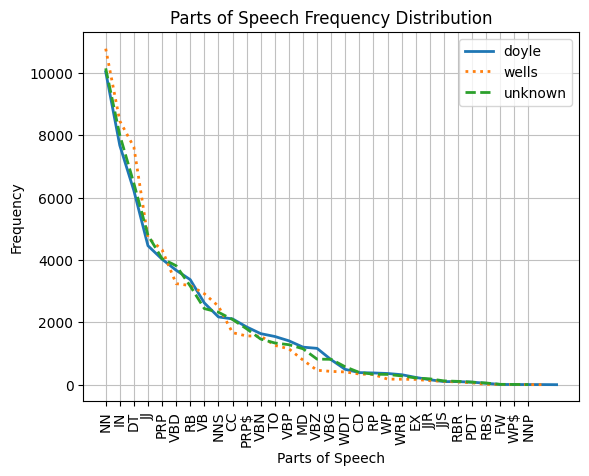

{'doyle': FreqDist({'NN': 10036, 'IN': 7677, 'DT': 6225, 'PRP': 4458, 'JJ': 4026, 'VBD': 3671, 'RB': 3370, 'VB': 2623, 'CC': 2174, 'NNS': 2111, ...}),
 'wells': FreqDist({'NN': 10779, 'IN': 8461, 'DT': 7622, 'VBD': 4714, 'JJ': 4330, 'NNS': 3242, 'RB': 3180, 'CC': 2918, 'PRP': 2519, 'VBN': 1670, ...}),
 'unknown': FreqDist({'NN': 10148, 'IN': 8008, 'DT': 6457, 'JJ': 4795, 'PRP': 4045, 'VBD': 3816, 'RB': 3165, 'VB': 2441, 'NNS': 2325, 'CC': 2092, ...})}

In [428]:
parts_of_speech_test(words_by_author, len_shortest_corpus)

In [429]:
def vocab_test(words_by_author):
    chisquared_by_author = dict()
    for author in words_by_author:
        if author != 'unknown':
            combined_corpus = (words_by_author[author] + words_by_author['unknown'])
            author_proportion = (len(words_by_author[author]) / len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))
            chisquared = 0
            for word, combined_count in most_common_words:
                observed_author_count = words_by_author[author].count(word)
                expected_author_count = combined_count * author_proportion
                chisquared += ((observed_author_count - expected_author_count) ** 2 / expected_author_count)
                chisquared_by_author[author] = chisquared
            print("\n Chi-squared for", author, ":", chisquared)
    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print("\n Most likely author:", most_likely_author)
            

In [430]:
vocab_test(words_by_author)


 Chi-squared for doyle : 4560.87221459012

 Chi-squared for wells : 6689.952859138766

 Most likely author: doyle


Jaccard's propability

In [431]:
def jaccard_test(words_by_author, len_shortest_corpus):
    jaccard_by_author = dict()
    unique_words_unknown = set(words_by_author['unknown'][:len_shortest_corpus])
    authors = (author for author in words_by_author if author != 'unknown')
    
    for author in authors:
        unique_words_author = set(words_by_author[author][:len_shortest_corpus])
        shared_words = unique_words_unknown.intersection(unique_words_author)
        jaccard_sim = (float(len(shared_words)) / (len(unique_words_author) + len(unique_words_unknown) - len(shared_words)))
        
        jaccard_by_author[author] = jaccard_sim
        print("\n Jaccard similarity for", author, ":", jaccard_sim)
    
    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print("\n Most likely author:", most_likely_author)
    return most_likely_author

In [432]:
jaccard_test(words_by_author, len_shortest_corpus)


 Jaccard similarity for doyle : 0.3477677072843236

 Jaccard similarity for wells : 0.29908168197196716

 Most likely author: doyle


'doyle'